In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\kdp\AppData\Local\Temp\ipykernel_20844\741550169.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
stormdf = pd.read_csv('폭풍일수.csv', encoding='euc-kr', skiprows=range(4))
thunderdf = pd.read_csv('뇌전일수.csv', encoding='euc-kr', skiprows=range(4))

stormdf.dropna(inplace=True)
stormdf.reset_index(drop=True, inplace=True)
stormdf = stormdf.apply(lambda x: pd.to_numeric(x))

thunderdf.dropna(inplace=True)
thunderdf.reset_index(drop=True)
thunderdf= thunderdf.apply(lambda x: pd.to_numeric(x))

stormdf

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연합계,순위
0,1908,1.6,1.7,1.7,0.8,0.5,0.5,0.4,0.3,0.3,0.5,1.5,1.3,11.2,14.0
1,1909,1.0,1.6,1.4,1.2,0.3,0.2,0.5,0.1,0.2,0.3,1.3,1.8,10.0,21.0
2,1910,1.3,1.2,2.0,0.7,0.3,0.5,0.6,0.3,0.3,0.2,0.9,1.4,9.7,24.0
3,1911,1.1,1.2,1.3,0.7,0.2,0.2,0.7,0.2,0.5,0.4,1.0,1.2,8.5,36.0
4,1912,1.4,0.9,0.8,1.2,0.6,0.0,0.4,0.2,0.4,0.8,1.1,1.3,9.2,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2019,0.0,0.2,0.1,0.1,0.2,0.0,0.0,0.0,0.5,0.2,0.2,0.2,1.5,110.0
112,2020,0.2,0.2,0.3,0.2,0.0,0.2,0.0,0.0,0.8,0.0,0.2,0.2,2.2,90.0
113,2021,0.3,0.2,0.2,0.1,0.2,0.0,0.3,0.2,0.1,0.2,0.0,0.2,1.8,102.0
114,2022,0.1,0.2,0.1,0.0,0.0,0.1,0.0,0.0,0.6,0.2,0.2,0.3,1.8,99.0


In [4]:
stormyear = stormdf.loc[:,("연도","연합계")]
# stormyear['연도'] = stormyear['연도']
thunderyear = thunderdf.loc[:,("연도","연합계")]
# thunderyear['연도'] = thunderyear['연도']

In [11]:
# jan_s= stormdf['1월'].mean()
# jan_t= thunderdf['1월'].mean()
# feb_s= stormdf['2월'].mean()
# feb_t= thunderdf['2월'].mean()
# mar_s= stormdf['3월'].mean()
# mar_t = thunderdf['3월'].mean()
# 
# storm_means = dict([])
# thunder_means = dict([])
thunder_means = thunderdf.mean()[1:13]
storm_means = stormdf.mean()[1:13]


([<matplotlib.axis.XTick at 0x14ff62c9c50>,
 [Text(0.0, 0, '1'),
  Text(1.0, 0, '2'),
  Text(2.0, 0, '3'),
  Text(3.0, 0, '4'),
  Text(4.0, 0, '5'),
  Text(5.0, 0, '6'),
  Text(6.0, 0, '7'),
  Text(7.0, 0, '8'),
  Text(8.0, 0, '9'),
  Text(9.0, 0, '10'),
  Text(10.0, 0, '11'),
  Text(11.0, 0, '12')])

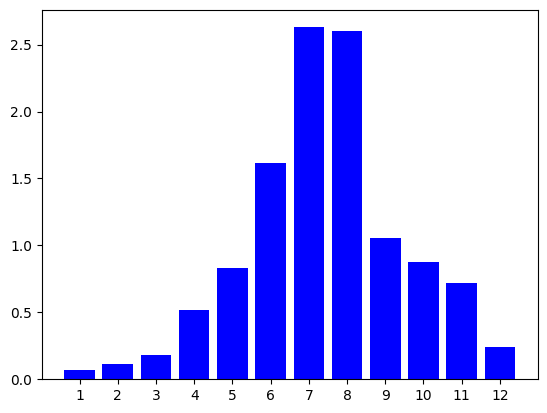

In [18]:
value = thunder_means
months = ['1','2', '3', '4','5','6','7','8','9','10','11','12']

plt.bar(months, thunder_means, color='blue')
plt.xticks(months, months)




([<matplotlib.axis.XTick at 0x14ff64ae690>,
 [Text(0.0, 0, '1'),
  Text(1.0, 0, '2'),
  Text(2.0, 0, '3'),
  Text(3.0, 0, '4'),
  Text(4.0, 0, '5'),
  Text(5.0, 0, '6'),
  Text(6.0, 0, '7'),
  Text(7.0, 0, '8'),
  Text(8.0, 0, '9'),
  Text(9.0, 0, '10'),
  Text(10.0, 0, '11'),
  Text(11.0, 0, '12')])

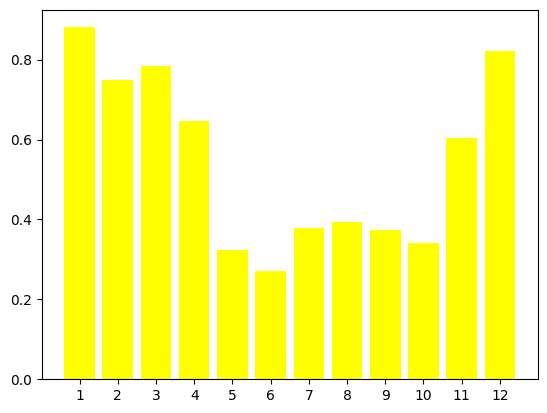

In [19]:
value2=storm_means
months2 = ['1','2', '3', '4','5','6','7','8','9','10','11','12']

plt.bar(months, value2, color='yellow')
plt.xticks(months2, months2)


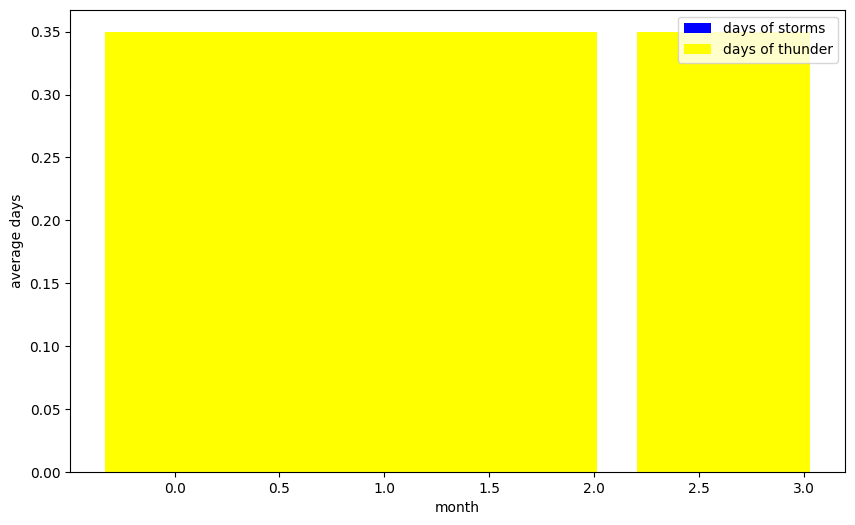

In [12]:
plt.figure(figsize = (10, 6))
bar_width = 0.35

plt.bar(storm_means, bar_width, label='days of storms', color='blue')
plt.bar(thunder_means, bar_width, label='days of thunder', color='yellow')

plt.xlabel('month')
plt.ylabel('average days')
plt.legend()

plt.tight_layout
plt.show()

Text(0.5, 1.0, 'comparison between thunder and storms')

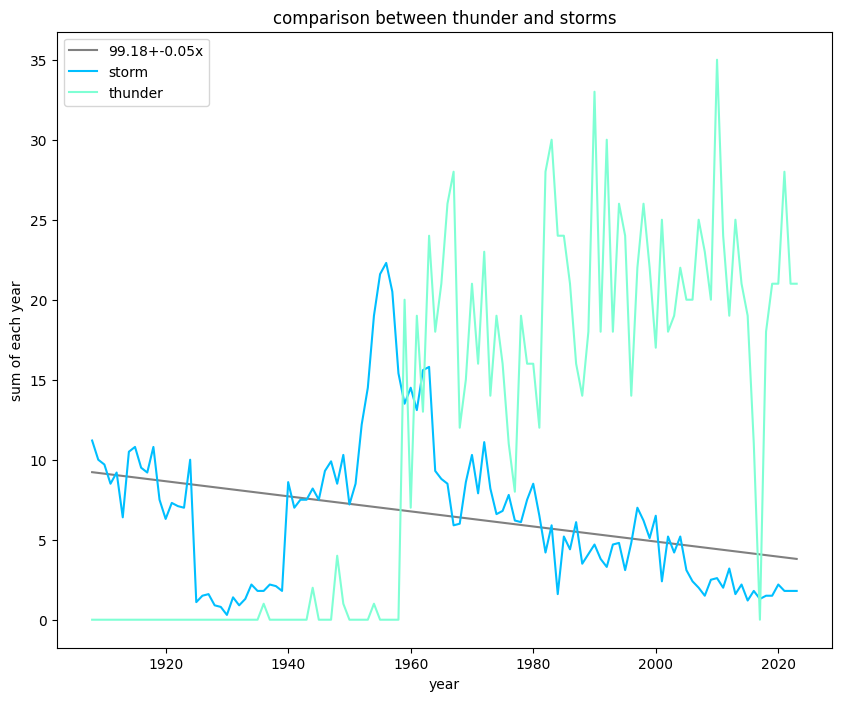

In [6]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
poly_fit = np.polyfit(thunderyear['연도'], stormyear['연합계'], 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(stormyear['연도'].min(), thunderyear['연도'].max())
ys = poly_1d(xs)

ax.plot(xs,ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
plt.plot(stormyear['연도'], stormyear['연합계'], color='deepskyblue', label='storm')
plt.plot(thunderyear['연도'],thunderyear['연합계'], color='aquamarine', label= 'thunder')
#ax.scatter(thunderyear['연합계'], stormyear['연합계'], color='deepskyblue', label='storm')
plt.xlabel('year')
plt.ylabel('sum of each year')
#plt.xticks(["" for x in range(stormyear.shape[0])],rotation = 90)
plt.legend()
plt.title('comparison between thunder and storms')
